In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
from pathlib import Path
csvpath = Path('./Resources/berkshire_final.csv')
df = pd.read_csv(csvpath, index_col='Date', parse_dates=True, infer_datetime_format=True)
df.head()

,Market Return,Portfolio Return without Rebalancing,Portfolio Return with Rebalancing,Portfolio Return with Lagged Rebalancing
Date,,,,
2018-06-29,NaN,NaN,NaN,NaN
2018-07-02,1.002766,1.003619,1.003619,NaN
2018-07-03,0.998673,0.996927,0.996927,NaN
2018-07-05,1.007006,1.005320,1.005320,NaN
2018-07-06,1.015414,1.011935,1.011935,NaN


In [4]:
df = df.iloc[1:]
df.head()

,Market Return,Portfolio Return without Rebalancing,Portfolio Return with Rebalancing,Portfolio Return with Lagged Rebalancing
Date,,,,
2018-07-02,1.002766,1.003619,1.003619,NaN
2018-07-03,0.998673,0.996927,0.996927,NaN
2018-07-05,1.007006,1.005320,1.005320,NaN
2018-07-06,1.015414,1.011935,1.011935,NaN
2018-07-09,1.024706,1.024373,1.024373,NaN


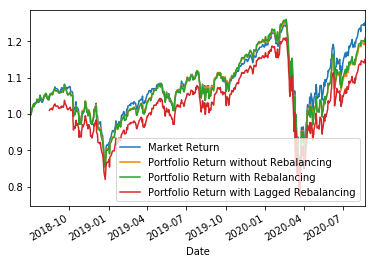

In [5]:
df.plot()

In [6]:
# dropping out two columns
data_df = df.drop(columns=['Portfolio Return without Rebalancing', 'Portfolio Return with Lagged Rebalancing'])
data_df.head(2)

,Market Return,Portfolio Return with Rebalancing
Date,,
2018-07-02,1.002766,1.003619
2018-07-03,0.998673,0.996927


In [7]:
portfolio = df["Portfolio Return with Rebalancing"].to_frame().dropna()
portfolio.head(2)

,Portfolio Return with Rebalancing
Date,
2018-07-02,1.003619
2018-07-03,0.996927


### Augmented Dickey-Fuller Test

In [8]:
from statsmodels.tsa.stattools import adfuller
adfuller(portfolio)

(-2.447300949839298,
 0.12882850614236474,
 9,
 528,
 {'1%': -3.4427957890025533,
  '5%': -2.867029512430173,
  '10%': -2.5696937122646926},
 -2834.4495670524875)

P-value is more than 0.05 indicating the data is non-statinary

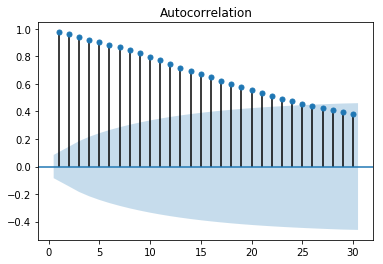

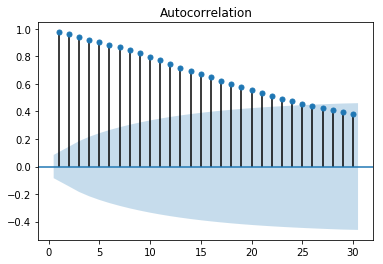

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot the autocorrelation of the Settle Prices
plot_acf(portfolio, zero=False, lags=30)

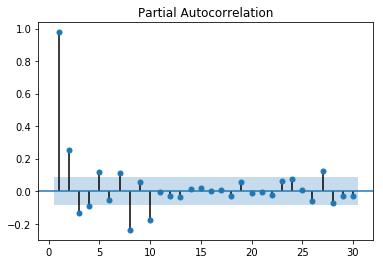

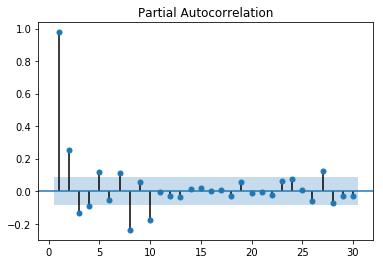

In [10]:
# Plot the partial autocorrelation of the returns
plot_pacf(portfolio, zero=False, lags=30)

In [11]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(portfolio,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2886.713, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2842.876, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2883.445, Time=0.21 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2872.225, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2844.608, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2887.862, Time=0.71 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2891.925, Time=0.17 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2894.708, Time=0.21 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2902.052, Time=0.69 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-2901.004, Time=1.09 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-2899.502, Time=0.35 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-2930.179, Time=0.93 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-2923.387, Time=1.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2894.403, Time=0.53 sec
 ARIMA(4,1,2)(0,0,0

In [12]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  538
Model:               SARIMAX(3, 1, 1)   Log Likelihood                1471.089
Date:                Tue, 25 Aug 2020   AIC                          -2930.179
Time:                        16:47:46   BIC                          -2904.463
Sample:                             0   HQIC                         -2920.119
                                - 538                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0007      0.001      0.493      0.622      -0.002       0.004
ar.L1         -1.0752      0.031    -35.093      0.000      -1.135      -1.015
ar.L2         -0.0098      0.033     -0.298      0.765      -0.075       0.055
ar.L3          0.2630      0.023     11.554      0.000       0.218       0.308
ma.L1          0.8980      0.026     34.025      0.000       0.846       0.950
sigma2         0.0002   6.72e-06     35.759      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       54.72   Jarque-Bera (JB):              1829.56
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               4.83   Skew:                            -1.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA Model

In [13]:
from statsmodels.tsa.arima_model import ARIMA

In [14]:
# Create an ARIMA model
model = ARIMA(portfolio, order=(3, 1, 1))

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [15]:
# Fit the model to the data
results = model.fit()

In [16]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      ARIMA Model Results                                      
===============================================================================================
Dep. Variable:     D.Portfolio Return with Rebalancing   No. Observations:                  537
Model:                                  ARIMA(3, 1, 1)   Log Likelihood                1471.208
Method:                                        css-mle   S.D. of innovations              0.016
Date:                                 Tue, 25 Aug 2020   AIC                          -2930.416
Time:                                         16:47:47   BIC                          -2904.700
Sample:                                              1   HQIC                         -2920.356
                                                                                               
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                         0.0004      0.001      0.559      0.576      -0.001       0.002
ar.L1.D.Portfolio Return with Rebalancing    -1.0943      0.051    -21.384      0.000      -1.195      -0.994
ar.L2.D.Portfolio Return with Rebalancing    -0.0282      0.064     -0.440      0.660      -0.154       0.097
ar.L3.D.Portfolio Return with Rebalancing     0.2508      0.043      5.785      0.000       0.166       0.336
ma.L1.D.Portfolio Return with Rebalancing     0.9078      0.035     26.050      0.000       0.839       0.976
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1928           -0.4164j            1.2634           -0.4465
AR.2           -1.1928           +0.4164j            1.2634            0.4465
AR.3            2.4979           -0.0000j            2.4979           -0.0000
MA.1           -1.1016           +0.0000j            1.1016            0.5000
-----------------------------------------------------------------------------
"""

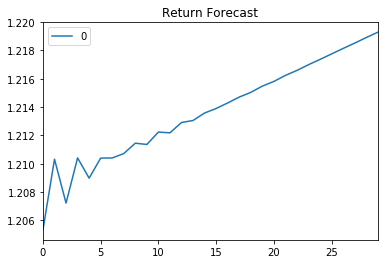

In [18]:
# create a dataframe that holds the forecast values.
return_forecast = pd.DataFrame(results.forecast(steps=30)[0])
# Visualize the forecast
return_forecast.plot(title="Return Forecast")

## Forecast Market Return 

In [21]:
market = df["Market Return"].to_frame().dropna()
market.head(2)

,Market Return
Date,
2018-07-02,1.002766
2018-07-03,0.998673


In [22]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(market,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7,
 trace=True, 
 error_action='ignore', 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2959.148, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2920.412, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2955.463, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2945.649, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2921.967, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2964.549, Time=1.31 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2965.200, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-2966.737, Time=0.63 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-2973.603, Time=0.51 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-2973.780, Time=0.56 sec
 ARIMA(6,1,0)(0,0,0)[0] intercept   : AIC=-2978.197, Time=0.40 sec
 ARIMA(7,1,0)(0,0,0)[0] intercept   : AIC=-3002.991, Time=0.85 sec
 ARIMA(7,1,1)(0,0,0)[0] intercept   : AIC=-3013.459, Time=2.53 sec
 ARIMA(6,1,1)(0,0,0)[0] intercept   : AIC=-3006.681, Time=2.53 sec
 ARIMA(7,1,2)(0,0,0

In [23]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  540
Model:               SARIMAX(7, 1, 1)   Log Likelihood                1516.754
Date:                Mon, 24 Aug 2020   AIC                          -3015.508
Time:                        19:16:54   BIC                          -2976.900
Sample:                             0   HQIC                         -3000.407
                                - 540                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6790      0.076     -8.957      0.000      -0.828      -0.530
ar.L2          0.0710      0.031      2.298      0.022       0.010       0.131
ar.L3          0.1468      0.031      4.793      0.000       0.087       0.207
ar.L4         -0.0918      0.031     -2.994      0.003      -0.152      -0.032
ar.L5         -0.0488      0.037     -1.312      0.190      -0.122       0.024
ar.L6         -0.0322      0.034     -0.943      0.346      -0.099       0.035
ar.L7          0.1898      0.033      5.763      0.000       0.125       0.254
ma.L1          0.5529      0.078      7.094      0.000       0.400       0.706
sigma2         0.0002   6.21e-06     33.305      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       36.03   Jarque-Bera (JB):              1420.26
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               4.07   Skew:                            -0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
# Create an ARIMA model
model_1 = ARIMA(market, order=(7, 1, 1))

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [25]:
# Fit the model to the data
results_1 = model_1.fit()

In [26]:
# Print the model summary
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.Market Return   No. Observations:                  539
Model:                 ARIMA(7, 1, 1)   Log Likelihood                1517.254
Method:                       css-mle   S.D. of innovations              0.014
Date:                Mon, 24 Aug 2020   AIC                          -3014.508
Time:                        19:18:44   BIC                          -2971.611
Sample:                             1   HQIC                         -2997.730
                                                                              
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0005      0.001      0.713      0.476      -0.001       0.002
ar.L1.D.Market Return    -0.7102      0.102     -6.949      0.000      -0.911      -0.510
ar.L2.D.Market Return     0.0517      0.055      0.935      0.350      -0.057       0.160
ar.L3.D.Market Return     0.1546      0.054      2.860      0.004       0.049       0.261
ar.L4.D.Market Return    -0.0804      0.053     -1.524      0.127      -0.184       0.023
ar.L5.D.Market Return    -0.0477      0.052     -0.909      0.363      -0.151       0.055
ar.L6.D.Market Return    -0.0408      0.052     -0.784      0.433      -0.143       0.061
ar.L7.D.Market Return     0.1661      0.050      3.330      0.001       0.068       0.264
ma.L1.D.Market Return     0.5702      0.098      5.799      0.000       0.377       0.763
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9965           -0.4353j            1.0874           -0.4345
AR.2           -0.9965           +0.4353j            1.0874            0.4345
AR.3           -0.5162           -1.2078j            1.3135           -0.3143
AR.4           -0.5162           +1.2078j            1.3135            0.3143
AR.5            0.8953           -1.0916j            1.4118           -0.1407
AR.6            0.8953           +1.0916j            1.4118            0.1407
AR.7            1.4808           -0.0000j            1.4808           -0.0000
MA.1           -1.7537           +0.0000j            1.7537            0.5000
-----------------------------------------------------------------------------
"""

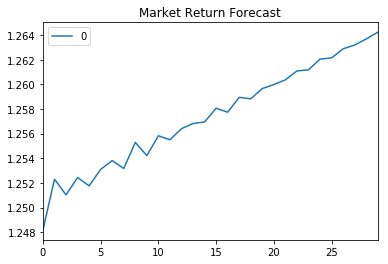

In [31]:
# create a dataframe that holds the forecast values.
market_return_forecast = pd.DataFrame(results_1.forecast(steps=30)[0])

# Visualize the forecast
market_return_forecast.plot(title="Market Return Forecast")

In [39]:
# concatenate the dataframes
forecast_df = pd.concat([return_forecast, market_return_forecast], axis=1)
forecast_df.columns = ["Portfolio Return Forecast", "Market Return Forecast"]
forecast_df.head()

,Portfolio Return Forecast,Market Return Forecast
0,1.205323,1.248187
1,1.210317,1.252302
2,1.207221,1.251030
3,1.210411,1.252436
4,1.208979,1.251764


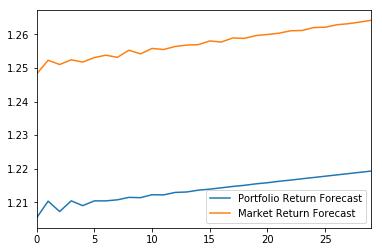

In [42]:

forecast_df.plot()